# Как собрать свой беспилотник за 1.5 часа

<!-- *Какова концепция моего мастер-класса? Я постараюсь за 1.5 часа рассказать максимально сжатую теорию по тому, как работают беспилотные системы, как можно разрабатывать и создавать их у себя дома, а также показать, насколько много готовых решений, ускоряющих процесс разработки, существует в этой сфере* 
 -->
 
## Что я постараюсь за сегодня рассказать:

* Из чего состорит автопилот
* Какие алгоритмы использует автопилот
* Какие важные части архитектуры включает в себя автопилот
* Каковыми могут быть итерации от SAE0 до SAE5
* Показать протоптанные дорожки и рассказать, как этому обучаться
* Сделать акцент на машинном обучении
* Постарать использовать лишь те технологии, которые можно использовать в домашних условиях
* Проэкспериментировать с форматом лекций

Что желательно уже знать:
* Что такое нейронные сети и как их тренируют
* Питон

## Содержание

* Брифинг
* Курс молодого инженера
* Боевое крещение
* Разбор полетов

## Глава 0. Брифинг/Подготовка

### Язык и инструметы

<img src="materials/python-logo.png" alt="python" width="500"/>

<img src="materials/jupyter-logo.png" alt="jupyter" width="300"/>

<img src="materials/opencv-logo2.png" alt="opencv" width="300"/>

### Архитектура в общем виде

<img src="materials/perception_planning_control.png" alt="arch" width="800"/>

### Control

**Где взять модуль контроля?**

Вариант 1 (с кучей денег и репутацией)

1. Делаете себе имя среди компаний по производству беспилотных автомобилей
1. Договариваетесь с автопроизводителем о создании совместного продукта
1. Ждете выхода достаточно современного и технологически полного автомобиля, который вы сможете контролировать через некоторый интерфейс
1. Готово. Теперь вы можете контролировать этот автомобиль.

<img src="materials/moneyman.jpg" alt="igetmoney" width="300"/>

Вариант 2 (с паяльником)

1. Взять автомобиль с функциями круиз контроля, паркингом и т. п.
1. Взломать их CAN шину, чтобы понять, как отправлять сигналы на управление скоростью.
1. Купить переходничок CAN-USB в переходе.
1. Готово. Теперь вы можете контролировать (**частично**) этот автомобиль.

см. comma.ai (NB: смотри, но лучше не пользуйся, ибо затея эта крайне авантюрная, и гост она точно не пройдет)

<img src="materials/comma.jpg" alt="comma" width="300"/>

Вариант 3 (с кучей реле, сервоприводов и инженеров в команде)

1. Взять автомобиль, проехаться на нем, посмотреть, какие педальки, ручки, колесики и кнопочки вы используете
1. Собрать полностбю механизированного робота, который сможет по команде повторять ваши действия за автомобилем
1. Готово.

<img src="materials/fedor.jpg" alt="fedor" width="300"/>

Вариант 4 (виртуальный)

1. Взять компьютерный симулятор автомобиля
1. Готово.

<img src="materials/gta5_pure.jpg" alt="speed" width="400"/>

<img src="materials/gta5.jpg" alt="speed" width="400"/>

[*Sendtex: https://www.youtube.com/playlist?list=PLQVvvaa0QuDeETZEOy4VdocT7TOjfSA8a*](https://www.youtube.com/playlist?list=PLQVvvaa0QuDeETZEOy4VdocT7TOjfSA8a)

<img src="materials/drake0.jpg" alt="drake meme" width="300"/>

В симуляторе можно:
* Получать ground truth
* Получать контроль миром через api (ТС, пешеходы, погодные условия)
* Генерировать, записывать и воспроизводить логи с нужными дорожными ситуациями
* Запускать сразу несколько беспилотников
* Создавать синтетические датасеты (в хороших симуляторах)
* Сиумляция разнообразных датчиков (но нам почти не понадобится)
* Реализовать обучение с подкреплением

<img src="materials/carla-logo.png" alt="carla" width="300"/>

<img src="materials/carla_example.png" alt="carla example" width="700"/>

<img src="materials/carla_example2.jpg" alt="carla example" width="700"/>

Пара слов о *OSVF*

### Что будем делать?

А давайте сначала подумаем, что такое беспилотник?

<img src="materials/vehicle.jpg" alt="simple way" width="600"/>

**Ключевое требование - обеспечить сохранность всех участников дорожнего движения**

<img src="materials/SAE lEVELS.png" alt="SAE" width="1000"/>

<img src="materials/speed_poster.jpg" alt="speed" width="300"/>

<img src="materials/topdown.png" alt="top_down" width="600"/>

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/Aut32pR5PQA/0.jpg)](https://www.youtube.com/embed/Aut32pR5PQA)

Мы начнем L1, фиксация препятствий в зоне видимости

### Выбор датчиков

* Нам точно нужно распознавать препятствия
* Нужно распознавать проходимый путь (не пересекать сплошную и т. п.)
* Нужно распознавать объекты инфраструктуры (сигналы светофора и т. п.)

<img src="materials/3dways.png" alt="3dsensors" width="700"/>

#### Камеры

##### Визуальный спектр

<img src="materials/basler.png" alt="balser" width="300"/>

<img src="materials/Screenshot at 2019-10-11 18-43-24.png" alt="balser" width="600"/>

Как применять:
* Распознавание дорожной обстановки (светофоры, полотно, люди, машины)
* Визуальная одометрия
* Стриминг видео
* SFM

|Достоинства|Недостатки|
|-|-|
|Огромный выбор различных вариаций на рынке|Данные становятся полезными только после их обработки|
|Доступная цена|Множество параметров при выборе (разрешение, матрицы, аппаратная фунециональность)|
|Огромное количество информации, достаточной для человека||
|Вариативность объективов||
|||

##### Стерео камеры

<img src="materials/intelrealsense.jpg" alt="intel" width="300"/>
<img src="materials/stereo_shema.png" alt="stereo shema" width="300"/>

|Достоинства|Недостатки|
|-|-|
|Есть как готовые решения, так и возможности собрать самостоятельно|Вычислительная сложность|
|Большая плотность данных (зависит от разрешения и алгоритма)|Трудности с калибровкой|
|На выходе облако 3D точек и их цвет|Нелинейная ошибка|
|Возможность подстроиться под интересующую зону интересов|Необходимость грамотного подхода к выбору зоны интересов|
||Необходимость синхронизации затворов камер|

##### Структурированный свет

<img src="materials/kinect.jpg" alt="kinect" width="300"/>
<img src="materials/structured_schema.png" alt="structured light shema" width="300"/>

|Достоинства|Недостатки|
|-|-|
|Дешевое решение|Низкая дальность|
|Большая плотность точек реконструкции||
|На выходе облако 3D точек и их цвет||

##### Ик (ближний, SWIR, тепловизоры)

<img src="materials/ir1.jpg" alt="ir" width="300"/>
<img src="materials/ir2.jpg" alt="ir" width="300"/>

<img src="materials/ir_heat.png" alt="heatmap" width="300"/>

Матрицы камер работают в различных ИК диапозонах (могут включать в том числе и видимый спектр)

|Достоинства|Недостатки|
|-|-|
|Работа в условиях низкой освещенности|Диапозон, предоставляющий наиболее подробную информацию о температуре, стоит очень дорого|
|Отлично подходят для распознавания людей и работающей техники|Диапозон, предоставляющий наиболее подробную информацию о температуре, накладывает расходы на установку|

##### ToF

<img src="materials/tof.jpg" alt="tof" width="300"/>
<img src="materials/kinect2.jpg" alt="kinect2" width="300"/>

<img src="materials/kinect_schema.png" alt="shema" width="300"/>

|Достоинства|Недостатки|
|-|-|
|Небольшой размер|Низкая дальность|
|Точность|Чувствительность к фоновому свету|
|Частота до 160Гц||

Характеристики готовых решений: https://rosindustrial.org/3d-camera-survey

##### Лидары

<img src="materials/velodyne.jpg" alt="velodyne" width="300"/>

Принцип работы заключается в лучевом лазерном сканировании

|Достоинства|Недостатки|
|-|-|
|Высокая точность облака точек|Высокая стоимость|
|Простота разработки|Более дешевые модели имеют проблемы с пороговым сигналом переотражения|
|Частота работы 10+ Гц|Ненадежность в сложных условиях эксплуатации|

##### Радары

<img src="materials/radar.jpg" alt="radar" width="300"/>

|Достоинства|Недостатки|
|-|-|
|Точность определения дистанции|Низкая разрешающая способность|
|Получения данных о скорости объектов|Необходимость фильтрации данных, особенно в условиях эксплуатации среди множество металлических предметов|
|Доступный ценовой диапозон||
|Надежность в сложных погодных условиях||

Мы остановимся на одной обычной камере:
* Дешево
* Достаточно для человека
* Большое количество открытых данных

## Что делать с данными от сенсоров?

#### Обнаружение препятствий/обнаружение проходимого пути классическими методами компьютерного зрения

* Structure from motion

<img src="materials/sfm.jpeg" alt="sfm" width="500"/>

* Stereo Vision

<img src="materials/stereo_obstacles.jpeg" alt="stereo" width="500"/>

#### Локализация и одометрия

<img src="materials/slam.png" alt="slam" width="600"/>


* SLAM
    1. Найти некоторые ключевые точки
    2. Сохранить их в карту
    3. Использовать смщение относительно известных ключевых точек для определения движения

### Глубокое машинное обучение

#### 4 Основные задач компьютерного зрения и машинного обучения

<img src="materials/tasks.png" alt="speed" width="500"/>

- Классификация: в кадре находится шар
- Семантическая сегментация: в кадре находится шар или шары, вот их маска.
- Детекция объектов: в кадре находятся 7 шаров, вот зоны, где они располагаются.
- Объектная сегментация: В кадре находится 7 шаров, вот маски, где они располагаются

#### Классификация

<img src="materials/cnn.png" alt="speed" width="900"/>

![pareto](materials/paretto.png)

Взято с matworks https://www.mathworks.com/help/deeplearning/ug/pretrained-convolutional-neural-networks.html

Когда использовать:
- Необходимо распознать условия окружающей среды для выбора оптимальный претренированных сетей (к примеру погоду или время суток)

<img src="materials/cond.jpg" alt="speed" width="900"/>

#### Детекция

<img src="materials/FasterRCNN.png" alt="speed" width="400"/>

Два наиболее популярных подхода:
- RPN
- Slide window

Когда использовать:
    
- Необходимо детектировать сам факт присутствия объекта (дор. знаки)
- Искомый объект всегда подходит под прямоугольную форму (можно комплексировать прямо на кадре)
- Точность комплексирования не так важна, либо с комплексированием не возникнет трудностей
- Нужен трекинг объекта

<img src="materials/znak.jpg" alt="speed" width="600"/>

<img src="materials/detection_way.png" alt="detection" width="600"/>

#### Семантическая сегментация

<img src="materials/cat_segmentation.png" alt="speed" width="600"/>

- Необходимо использовать sensor fusion с датчиками, дающими информацию о 3D пространстве
- Необходимо находить объекты большой площади на кадре
- Разделение на сущности не важно

<img src="materials/road.jpeg" alt="speed" width="600"/>
<img src="materials/LidarCameraKitti.png" alt="speed" width="600"/>

#### Объектная сегментация

<img src="materials/maskrcnn.png" alt="speed" width="600"/>

- Необходимо получать данные с высокой достоверностью
- Искомые объекты можно разделить на сущности
- Позволяют аппаратные ресурсы
- Нужен трекинг объекта

<img src="materials/ins.png" alt="speed" width="600"/>

#### Детекция 3D

<img src="materials/header_3dobject.jpg" alt="3d" width="1200"/>

- Методы, работающие по одному кадру
- Методы, работающие по нескольким синхронным кадрам
- Методы, работающие с помощью оптического потока
- Методы, работающие с готовым трехмерным облаком точек

#### Когда применять?

В зависимости от входных данных, меняется и точность работы алгоритмов. Область применения - получение данных об объектах для их дальнейшего трекинга и предсказания пересечения траектории их движения с беспилотным транспортным средством

#### Детекция ключевых точек

<img src="materials/human_pose.png" alt="pose" width="1200"/>

* Обнаруживать людей
* Предсказывать их движение

#### Генерация изображения (аугментация ИИ)

<img src="materials/gta_cityscapes.png" alt="gta_city" width="800"/>

<img src="materials/say_night.jpg" alt="day_night" width="800"/>

* Аугменатция данных (день->ночь, зима->лето)
* Повышение реалистичности симуляторов с встроенной разметкой

#### Повышение разрешения

<img src="materials/disp_super.jpg" alt="disp_super" width="600"/>

* Повышение разрешения карты диспаратности
* Уменьшение вычислительных ресурсов процессора
* Уменьшение объема передаваемых данных при трансляции кадров

#### Предсказание глубины

<img src="materials/mono_depth.jpg" alt="mono_depth" width="800"/>

* Предсказание глубины по одному кадру для обнаружения препятствий и предсказанию расстояния до объектов

#### End-to-end learning

<img src="materials/uda.png" alt="uda" width="700"/>

Применение было показано в самом начале

### Planning

По данным от модулей распознавания предпринять дальнейшие действия на модуль контроля

### System managment (ROS, communications, etc.)

* межязыковое взаимодействие
* проверка на наличие аварийных ситуаций
* разделение ресурсов

~~Объективно~~ про ROS

|За|Против|
|-|-|
|Отличные средства отладки и визуализации|Попытка быть универсальным фреймворком для всего, где есть слово robot|
|Множество готовых модулей|Зачастую ROS пытаются внедрить потому что его внедряют или "А собственно зачем нужен ROS"|
|Большое сообщество|Ад систем сборок, установки библиотек поверх и бестактное обращение с питоном|
|Решается вопрос коммуникации между сервисами|ROS всегда дорабатывают|

## Глава 2. Практика

<img src="materials/bad_code.jpg" alt="bad" width="300"/>

* reinforcement by pure frame
* reinforcement by semantic only
* classic strict way
* reinforcement by state dict (own data format)

In [43]:
import cv2 as cv      # library for classic computer vision
import numpy as np    # library for working with matrices in python
import matplotlib     # library for visualization
import torch          # library for machine learning
import torchvision    # pretrained models and preprocessing operations
# import open3d as o3d  # library for working with 3d point cloud
import PIL            # library for working with images

In [44]:
import glob
import sys
import os

In [45]:
sys.path.append('../')

<!-- <img src="materials/open3d_logo_horizontal.png" alt="open3d" width="300"/> -->

<img src="materials/pytorch-logo-dark.png" alt="pytorch" width="300"/>

#### Почему PyTorch

* python style
* hub
* community

In [6]:
from CityScapesUtils import *  # useful stuff for cityscapes-like dataset

create input/target transforms for dataset

In [7]:
import torchvision.transforms as T

def torch_unsqueeze(input):
    return input.unsqueeze(0)

input_transform = T.Compose([
    T.ToTensor(), 
])

def target_transform(type_in, type_out):
    return T.Compose([
        CityscapesTransform(type_in, type_out),
        T.ToTensor(),
    ])

def target_in_net_transform(x):
    return x.type(torch.LongTensor)[0]

load carla dataset

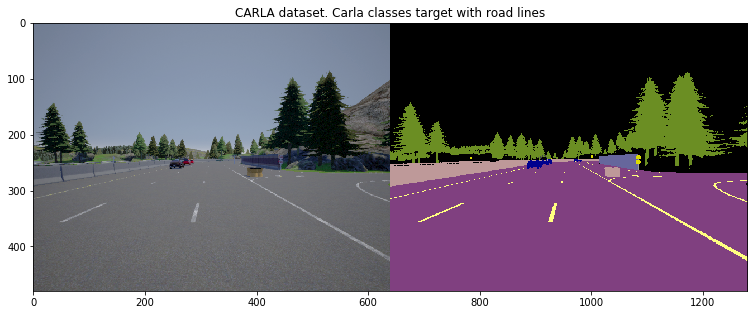

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

CARLA_dataset_path = '../../datasets/Carla_Sequence_04HIGH/'

CARLA_validation_dataset = torchvision.datasets.Cityscapes(
    CARLA_dataset_path, split='val', mode='fine', target_type='semantic',
    transform=input_transform, target_transform=target_transform('CarlaClasses', 'CarlaClassesWithRoadLines'))

CARLA_val_loader = torch.utils.data.DataLoader(
    CARLA_validation_dataset, batch_size=1)

g, smnt = CARLA_validation_dataset[2]

matplotlib.rcParams['figure.figsize'] = [12.8, 9.6]
plt.title('CARLA dataset. Carla classes target with road lines')
plt.imshow(
    np.hstack((
        (g.numpy().transpose(1, 2, 0)*255).astype(np.uint8),
        decode_cityscapes(smnt[0], mode='CarlaClassesWithRoadLines'))))
plt.show()

CarlaClasses

Мы будем использовать:
* Детекцию объектов
* Семантическую сегментацию
* Монокулярное стереозрение (оксюморон)
* Преобразование перспективы (для проекции на 2D)

In [53]:
%%HTML
<video width="1024" height="720" controls autoplay>
  <source src="materials/Peek 2019-04-03 11-22.mp4" type="video/mp4">
</video>

### Давайте посмотрим небольшой ролик, записанный в карле

In [9]:
seq_video = cv.VideoWriter('source_data.webm', cv.VideoWriter_fourcc(*'VP80'), 10, (640, 480))

In [10]:
import glob

img_pathes = glob.glob(CARLA_dataset_path + 'leftImg8bit/*/*/*')
img_count = len(img_pathes)

for i, img in enumerate(sorted(img_pathes)):
    img = cv.imread(img)
    seq_video.write(img)
    print('{}/{}'.format(i, img_count) , end='\r')

seq_video.release()

In [11]:
%%HTML
<video width="640" height="480" controls autoplay>
  <source src="source_data.webm" type="video/webm">
</video>

### Проверим доступность видеокарты

In [46]:
torch.cuda.is_available()

True

### Проверим ресурсы видеокарты

In [13]:
!nvidia-smi -i 0

Sat Nov  2 00:26:49 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.01    Driver Version: 418.87.01    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:17:00.0 Off |                  N/A |
| 20%   44C    P8     9W / 250W |     12MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

### Найдем претренированную сеть для детекции

**Задача: обнаруживать объекты препятствий на дороге (люди, машины, животные)**

#### SSD

In [14]:
# ssd_model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd', model_math='fp16').cuda().eval()

In [15]:
# ssd_utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd_processing_utils')

In [16]:
# classes_to_labels = ssd_utils.get_coco_object_dictionary()

In [17]:
# %%time
# ouput = None

# ssd_video = cv.VideoWriter('ssd_example.webm', cv.VideoWriter_fourcc(*'VP80'), 10, (640, 480))

# img_pathes = glob.glob(CARLA_dataset_path + 'leftImg8bit/*/*/*')
# img_count = len(img_pathes)

# for i, img in enumerate(sorted(img_pathes)):
#     img = cv.imread(img)
#     img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#     tensor = T.ToTensor()(cv.resize(img, (300, 300)))
#     tensor = tensor.unsqueeze(0)
    
#     output = ssd_model(tensor.half().cuda())
#     try:
#         results_per_input = ssd_utils.decode_results(output)
#         best_results_per_input = [ssd_utils.pick_best(results, 0.40) for results in results_per_input]

#         for image_idx in range(len(best_results_per_input)):
#             bboxes, classes, confidences = best_results_per_input[image_idx]
#             for idx in range(len(bboxes)):
#                 left, bot, right, top = bboxes[idx]
#                 x, y, w, h = [val * 300 for val in [left, bot, right - left, top - bot]]
#                 x, y, w, h = int(x*2.13), int(y*1.6), int(w*2.13), int(h*1.6)
#                 img = cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255))
                
#                 img = cv.putText(
#                     img, "{} {:.0f}%".format(classes_to_labels[classes[idx] - 1], confidences[idx]*100),
#                     (x,y), cv.FONT_HERSHEY_SIMPLEX, 0.75,(255,255,255),1,cv.LINE_AA)
#     except RuntimeError:
#         pass
    
#     ssd_video.write(cv.cvtColor(img, cv.COLOR_RGB2BGR))
#     print('{}/{}'.format(i, img_count) , end='\r')

# ssd_video.release()

In [18]:
%%HTML
<video width="640" height="480" controls autoplay>
  <source src="ssd_example.webm" type="video/webm">
</video>

#### Faster RCNN

In [19]:
faster_rcnn = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True, min_size=300).cuda().eval()

In [19]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [20]:
%%time
ouput = None

faster_video = cv.VideoWriter('faster_rcnn_example.webm', cv.VideoWriter_fourcc(*'VP80'), 10, (640, 480))

img_pathes = glob.glob(CARLA_dataset_path + 'leftImg8bit/*/*/*')
img_count = len(img_pathes)

CPU times: user 1min 3s, sys: 789 ms, total: 1min 3s
Wall time: 17.8 s


In [ ]:
for i, img in enumerate(sorted(img_pathes)):
    img = cv.cvtColor(cv.imread(img), cv.COLOR_BGR2RGB)
    tensor = T.ToTensor()(img)
    tensor = tensor.unsqueeze(0)
    
    pred = faster_rcnn(tensor.cuda())[0]
    
    boxes = pred['boxes'].cpu().detach().numpy().astype(np.int32)
    labels = pred['labels'].cpu().detach().numpy().astype(np.int32)
    scores = pred['scores'].cpu().detach().numpy()
    
    for idx in range(len(boxes)):
        box, label, score = boxes[idx], labels[idx], scores[idx]
        
        if score < 0.6:
            continue
        
        x, y, x2, y2 = box
        img = cv.rectangle(img, (x, y), (x2, y2), (0, 0, 255))
        img = cv.putText(
            img, "{} {:.0f}%".format(COCO_INSTANCE_CATEGORY_NAMES[label], score*100),
            (x,y), cv.FONT_HERSHEY_SIMPLEX, 0.75,(255,255,255),1,cv.LINE_AA)
    
    faster_video.write(cv.cvtColor(img, cv.COLOR_RGB2BGR))
    print('{}/{}'.format(i, img_count) , end='\r')

In [ ]:
faster_video.release()

In [21]:
%%HTML
<video width="640" height="480" controls autoplay>
  <source src="faster_rcnn_example.webm" type="video/webm">
</video>

In [22]:
!nvidia-smi -i 0

Sat Nov  2 00:27:27 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.01    Driver Version: 418.87.01    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:17:00.0 Off |                  N/A |
| 20%   48C    P2    57W / 250W |   1157MiB / 11178MiB |     15%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

#### Semantic segmentation

**Обнаруживать проходимый путь**

* DeepLab v3 (resnet101), COCO
* FCN (resnet101), COCO

DeepLab v3 (Squeeze net), KITTI

In [24]:
semantic_segmentation = torch.hub.load('sid1057/self-driving-cars-utils', 'DeepSqueeze', pretrained=True).cuda().eval().half()

In [25]:
%%time

segm_video = cv.VideoWriter('segm.webm', cv.VideoWriter_fourcc(*'VP80'), 10, (640, 480))

img_pathes = glob.glob(CARLA_dataset_path + 'leftImg8bit/*/*/*')
img_count = len(img_pathes)

for i, img in enumerate(sorted(img_pathes)):
    img = cv.imread(img)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    tensor = T.ToTensor()(img)
    tensor = tensor.unsqueeze(0)
    
    output = semantic_segmentation(tensor.cuda().half()).float()

    output = torch.argmax(output.squeeze(), dim=0).detach().cpu().numpy()
    output = decode_cityscapes(output, mode='CityScapesClasses')
    
    segm_video.write(cv.cvtColor(cv.addWeighted(output, 0.5, img, 0.9, 0), cv.COLOR_RGB2BGR))
    print('{}/{}'.format(i, img_count) , end='\r')

segm_video.release()

CPU times: user 1min, sys: 363 ms, total: 1min
Wall time: 16 s


In [26]:
%%HTML
<video width="640" height="480" controls autoplay>
  <source src="segm.webm" type="video/webm">
</video>

In [27]:
!nvidia-smi -i 0

Sat Nov  2 00:27:50 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.01    Driver Version: 418.87.01    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:17:00.0 Off |                  N/A |
| 20%   50C    P2    57W / 250W |   1163MiB / 11178MiB |      9%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

### Предсказание глубины

**Для особых объектов(машины, люди, животные), предсказывать расстояние и координату в пространстве**
*задел на будущее*

#### MonoDepth2 [https://github.com/nianticlabs/monodepth2/](https://github.com/nianticlabs/monodepth2/)

In [28]:
import networks
from utils import download_model_if_doesnt_exist

In [29]:
model_name = "mono_640x192"

download_model_if_doesnt_exist(model_name)
encoder_path = os.path.join("models", model_name, "encoder.pth")
depth_decoder_path = os.path.join("models", model_name, "depth.pth")

# LOADING PRETRAINED MODEL
encoder = networks.ResnetEncoder(18, False)
depth_decoder = networks.DepthDecoder(num_ch_enc=encoder.num_ch_enc, scales=range(4))

loaded_dict_enc = torch.load(encoder_path, map_location='cpu')
filtered_dict_enc = {k: v for k, v in loaded_dict_enc.items() if k in encoder.state_dict()}
encoder.load_state_dict(filtered_dict_enc)

loaded_dict = torch.load(depth_decoder_path, map_location='cpu')
depth_decoder.load_state_dict(loaded_dict)

encoder.cuda().eval()
depth_decoder.cuda().eval();

In [30]:
%%time

import PIL.Image as pil
from layers import disp_to_depth

depth_video = cv.VideoWriter('depth.webm', cv.VideoWriter_fourcc(*'VP80'), 10, (640, 480))

img_pathes = glob.glob(CARLA_dataset_path + 'leftImg8bit/*/*/*')
img_count = len(img_pathes)

CPU times: user 1min 11s, sys: 289 ms, total: 1min 11s
Wall time: 16.1 s


In [ ]:
for i, img in enumerate(sorted(img_pathes)):
    img = cv.cvtColor(cv.imread(img), cv.COLOR_BGR2RGB)

    input_image = T.ToPILImage()(img)
    original_width, original_height = input_image.size

    feed_height = loaded_dict_enc['height']
    feed_width = loaded_dict_enc['width']
    input_image_resized = input_image.resize((feed_width, feed_height), pil.LANCZOS)

    input_image_pytorch = T.ToTensor()(input_image_resized).unsqueeze(0)

    with torch.no_grad():
        features = encoder(input_image_pytorch.cuda())
        outputs = depth_decoder(features)

    disp = outputs[("disp", 0)].cpu()
    disp_resized = torch.nn.functional.interpolate(
        disp, (original_height, original_width), mode="bilinear", align_corners=False)
    
    pred_disp, _ = disp_to_depth(disp_resized, 10, 100)
    pred_disp = pred_disp.cpu()[:, 0].numpy()

    pred_depth = 5.4 / pred_disp
    disp_resized_np = cv.applyColorMap(
        cv.normalize(pred_depth[0], None, 0, 255, cv.NORM_MINMAX).astype(np.uint8), cv.COLORMAP_RAINBOW)
    
    depth_video.write(cv.cvtColor(cv.addWeighted(disp_resized_np, 0.5, img, 0.9, 0), cv.COLOR_RGB2BGR))
    print('{}/{}'.format(i, img_count) , end='\r')

In [ ]:
depth_video.release()

In [31]:
%%HTML
<video width="640" height="480" controls autoplay>
  <source src="depth.webm" type="video/webm">
</video>

In [32]:
!nvidia-smi -i 0

Sat Nov  2 00:28:07 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.01    Driver Version: 418.87.01    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:17:00.0 Off |                  N/A |
| 20%   52C    P2    57W / 250W |   1163MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

### Оформим все в виде функций

#### Получение глубины

In [33]:
def get_depth(img_rgb):
    input_image = T.ToPILImage()(img)
    original_width, original_height = input_image.size

    feed_height = loaded_dict_enc['height']
    feed_width = loaded_dict_enc['width']
    input_image_resized = input_image.resize((feed_width, feed_height), pil.LANCZOS)

    input_image_pytorch = T.ToTensor()(input_image_resized).unsqueeze(0)

    with torch.no_grad():
        features = encoder(input_image_pytorch.cuda())
        outputs = depth_decoder(features)

    disp = outputs[("disp", 0)].cpu()
    disp_resized = torch.nn.functional.interpolate(
        disp, (original_height, original_width), mode="bilinear", align_corners=False)
    
    pred_disp, _ = disp_to_depth(disp_resized, 10, 256)
    pred_disp = pred_disp.cpu()[:, 0].numpy()

#     pred_depth = 5.4 / pred_disp
    pred_depth = 1 / pred_disp
    return pred_depth[0]

#### Сегментация дороги

In [34]:
def get_road_mask(img_rgb):
    tensor = T.ToTensor()(img)
    tensor = tensor.unsqueeze(0)
    
    output = semantic_segmentation(tensor.cuda().half()).float()

    output = torch.argmax(output.squeeze(), dim=0).detach().cpu().numpy()
    return cv.inRange(output, 7, 7)

#### Детекция объектов

In [49]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


In [50]:
ROADWAY_OBSTACLES = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe'
]

In [35]:
def get_bboxes(img_rgb, depth=None):    
    mask_filled, mask_bbox, mask_dist = np.zeros_like(img_rgb), np.zeros_like(img_rgb), np.zeros_like(img_rgb)

    img = img_rgb.copy()
    tensor = T.ToTensor()(img)
    tensor = tensor.unsqueeze(0)
    
    pred = faster_rcnn(tensor.cuda())[0]
    
    boxes = pred['boxes'].cpu().detach().numpy().astype(np.int32)
    labels = pred['labels'].cpu().detach().numpy().astype(np.int32)
    scores = pred['scores'].cpu().detach().numpy()
    
    for idx in range(len(boxes)):
        box, label, score = boxes[idx], labels[idx], scores[idx]
        
        if score < 0.6 or not (COCO_INSTANCE_CATEGORY_NAMES[label] in ROADWAY_OBSTACLES):
            continue
        
        x, y, x2, y2 = box
        mask_bbox = cv.rectangle(mask_bbox, (x, y), (x2, y2), (0, 0, 255))
        mask_filled = cv.rectangle(mask_filled, (x, y), (x2, y2), (255, 0, 0), cv.FILLED)
        mask_dist = cv.rectangle(mask_dist, (x, y), (x2, y2), (0, 0, 255))
        
        mask_bbox = cv.putText(
            mask_bbox, "{} {:.0f}%".format(COCO_INSTANCE_CATEGORY_NAMES[label], score*100),
            (x,y), cv.FONT_HERSHEY_SIMPLEX, 0.75,(255,255,255),1,cv.LINE_AA)
        
        if depth is not None:
            dist = depth[y2-1:y2, x2-1:x2].mean().astype(np.uint8)
            mask_dist = cv.putText(
                mask_dist, "{}m".format(dist),
                (x,y), cv.FONT_HERSHEY_SIMPLEX, 0.75,(255,255,255),1,cv.LINE_AA)
        
    return mask_filled, mask_bbox, mask_dist

In [35]:
%
        mask_bbox = cv.putText(
            mask_bbox, "{} {:.0f}%".format(COCO_INSTANCE_CATEGORY_NAMES[label], score*100),
            (x,y), cv.FONT_HERSHEY_SIMPLEX, 0.75,(255,255,255),1,cv.LINE_AA)
        
        if depth is not None:
            dist = depth[y2-1:y2, x2-1:x2].mean().astype(np.uint8)
            mask_dist = cv.putText(
                mask_dist, "{}m".format(dist),
                (x,y), cv.FONT_HERSHEY_SIMPLEX, 0.75,(255,255,255),1,cv.LINE_AA)
        
    return mask_filled, mask_bbox, mask_dist

#### Преобразование перспективы

In [36]:
IMAGE_H = 480
IMAGE_W = 640

src = np.float32([[292, 275], [353, 275], [564, 480], [55, 480]])
dst = np.float32([[IMAGE_W//8*3, IMAGE_H//2], [IMAGE_W//8*5, IMAGE_H//2], [IMAGE_W//8*5, IMAGE_H], [IMAGE_W//8*3, IMAGE_H]])
M = cv.getPerspectiveTransform(src, dst) # The transformation matrix
    
def get_bird_view(img_rgb):
    return cv.warpPerspective(img_rgb, M, (IMAGE_W, IMAGE_H))

#### Объединяем все вместе

In [37]:
%%time

import PIL.Image as pil
from layers import disp_to_depth

complex_video = cv.VideoWriter('complex.webm', cv.VideoWriter_fourcc(*'VP80'), 10, (640*2, 480*2))

img_pathes = glob.glob(CARLA_dataset_path + 'leftImg8bit/*/*/*')
img_count = len(img_pathes)

CPU times: user 2min 13s, sys: 1.39 s, total: 2min 14s
Wall time: 51.7 s


In [ ]:
for i, img in enumerate(sorted(img_pathes)):
    result_image = np.zeros((480*2, 640*2, 3), dtype=np.uint8)
    
    img = cv.imread(img)
    cv.imwrite('img.png', img)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    road_mask = get_road_mask(img_rgb)
    depth = get_depth(img_rgb)
    mask_filled, mask_bbox, mask_dist = get_bboxes(img_rgb, depth)
    
    view = cv.add(img_rgb, mask_filled)
    view[..., 1] = cv.addWeighted(view[..., 1], 1, road_mask, 0.3, 0)
    view = get_bird_view(view)
    
    complex_image = img_rgb.copy()
    complex_image[..., 1] = cv.addWeighted(complex_image[..., 1], 1, road_mask, 0.3, 0)
    complex_image = cv.add(complex_image, mask_dist)
    
    depth_for_viz = cv.applyColorMap(
        cv.normalize(depth, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8), cv.COLORMAP_RAINBOW)
    depth_for_viz = cv.cvtColor(depth_for_viz, cv.COLOR_BGR2RGB)
    
    result_image[:480, :640] = img_rgb
    result_image[:480, 640:] = complex_image
    result_image[480:, :640] = depth_for_viz
    result_image[480:, 640:] = view
    
    complex_video.write(cv.cvtColor(result_image, cv.COLOR_RGB2BGR))
    print('{}/{}'.format(i, img_count) , end='\r')

In [ ]:
complex_video.release()

In [39]:
%%HTML
<video width="1280" height="720" controls autoplay>
  <source src="complex.webm" type="video/webm">
</video>

In [40]:
!nvidia-smi -i 0

Sat Nov  2 00:28:59 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.01    Driver Version: 418.87.01    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:17:00.0 Off |                  N/A |
| 20%   56C    P2    59W / 250W |   1259MiB / 11178MiB |     14%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

* Это в 3 раза меньше чем память у Jetson Nano за ~99$

<img src="materials/nano.jpg" alt="jpg" width="600"/>

<img src="materials/ernest.jpg" alt="bad" width="300"/>

Кто ещё делает нечто подобное?
* comma.ai
* sendtex

## Что дальше?

### Следующая игра?

<img src="materials/speed_poster.jpg" alt="speed" width="300"/>

* Не снижать скорость ниже заданного значения
* Данные берутся только с одной камеры
* Избегать столкновений, ориентируясь как на препятствия, так и на дорожную обстановку

Для этого требуется:

* Разработать программную архитектуру
* Написать скрипт контроля
* Написать модуль планирования

<img src="materials/outrun.jpg" alt="speed" width="300"/>

Out Run: За наименьшее время добраться из пункта А в пункт Б не попав в аварию

<img src="materials/chasehq.jpg" alt="chasehq" width="300"/>

Chase HQ: Протаранить машину преступника, которая соответствует написанной сегодня нами

<img src="materials/f1.jpg" alt="f1" width="300"/>

F1: пройти закрытый от других участников движения маршрут быстрее соперников

<img src="materials/colimmcrae.jpg" alt="mcrae" width="300"/>

Colin McRae 2.0: Пройти маршрут по открытой местности быстрее соперников

<img src="materials/mostwanted.jpg" alt="nfs" width="300"/>

NFS Most Wanted (2003): Пройти городской маршрут быстрее соперников, при условии ухода от погони

### Где подвох?

* Хорошие условия эксплуатации

* 99.(9)%

* Аппаратная часть

* Нет необходимости комплексировать различные датчики

* Нет модуля планирования

* Модуль контроля из коробки

# Спасибо за внимание!

* **email**: ivanov.dale@gmail.com  (`topic: self-driving`)
* **github**: sid1057
* **linkedin**: ivan-deylid

Ссылка на код, презентацию, материалы и продолжение тутора: [sid1057.github.io/self-driving](https://sid1057.github.io/self-driving/)